<a href="https://colab.research.google.com/github/Aggarwal13/ML_MODELS/blob/main/ENSEMBLE_LEARNING_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

In [ ]:
df=pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df['Gender'].replace(['Male','Female'], [1,0], inplace=True)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
df.drop('User ID', axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


<Axes: xlabel='Purchased'>

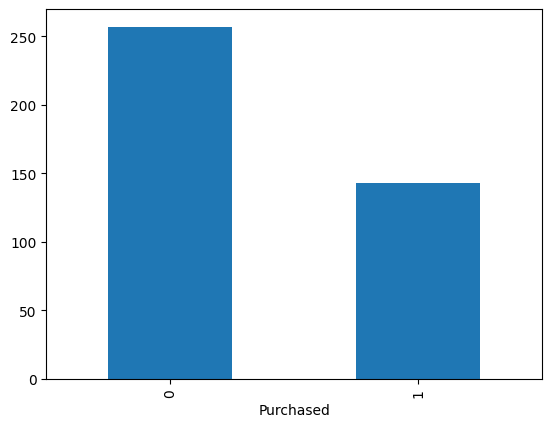

In [ ]:
df.Purchased.value_counts().plot(kind='bar')

In [ ]:
features=['Gender','Age']
x=df[features]
y=df.Purchased

In [ ]:
#KNN
max_features=3
model=KNeighborsClassifier()
kfold=model_selection.KFold(n_splits=10)
results=model_selection.cross_val_score(model,x,y,cv=kfold)
print("acuraccy",round(results.mean()*100,2))

acuraccy 80.5


In [ ]:
#DECISION TREE
max_features=3
kfold=model_selection.KFold(n_splits=10)
model=DecisionTreeClassifier(criterion='gini')
results=model_selection.cross_val_score(model,x,y,cv=kfold)
print("acuraccy",round(results.mean()*100,2))

acuraccy 78.25


CONCEPT OF BAGGING


In [57]:

kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for BaggingClassifier:", round(results.mean()*100, 2)) #80%

Accuracy for BaggingClassifier: 79.25


In [58]:
from sklearn.ensemble import RandomForestClassifier

kfolds=model_selection.KFold(10)
num_trees=200
model=RandomForestClassifier(n_estimators=num_trees)
results=model_selection.cross_val_score(model,x,y,cv=kfolds)
print("acuraccy",round(results.mean()*100,2))

acuraccy 79.75


In [60]:
from sklearn.ensemble import ExtraTreesClassifier

seed = 7
num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = ExtraTreesClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for ExtraTreesClassifier:", round(results.mean()*100, 2)) #78.5

Accuracy for ExtraTreesClassifier: 78.5


CONCEPT OF BOOSTING

In [61]:
from sklearn.ensemble import AdaBoostClassifier


num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for AdaBoostClassifier:", round(results.mean()*100, 2))

Accuracy for AdaBoostClassifier: 83.0


In [62]:
from sklearn.ensemble import GradientBoostingClassifier


num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for GradientBoostingClassifier:", round(results.mean()*100, 2))

Accuracy for GradientBoostingClassifier: 80.5


In [69]:
import xgboost as xgb


num_trees = 500
kfold = model_selection.KFold(n_splits=10)
model = xgb.XGBClassifier(n_estimators=num_trees)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
print("Accuracy for XGBoost:", round(results.mean()*100, 2))

Accuracy for XGBoost: 80.75


CONCEPT OF VOTING CLASSIFIER


In [78]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold=model_selection.KFold(n_splits=10)

estimators=[]

model1=LogisticRegression()
estimators.append(('logistic',model1))

model2=SVC()
estimators.append(('SVC',model2))

model3=DecisionTreeClassifier()
estimators.append(('DecisionTreeClassifier',model3))

ensemble=VotingClassifier(estimators)

results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print("Accuracy for VotingClassifier:", round(results.mean()*100, 2))


Accuracy for VotingClassifier: 83.5
